In [55]:
import pandas as pd
data_filled = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_october.csv')
data_filled

,datetime,row,col,AWS,CAPE,EWSS,IE,ISOR,KX,PEV,...,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,WVB
0,2019-10-01 00:00:00,0,114,0.0,0.000,-9.753906,-0.000024,0.588248,27.777672,-0.000032,...,251.077927,260.335907,290.436249,265.725128,293.015350,274.013733,289.847046,294.758087,293.319122,241.023636
1,2019-10-01 01:00:00,0,114,0.0,0.000,-35.976562,-0.000062,0.588248,28.158981,-0.000188,...,208.891647,208.200882,242.788956,222.065552,244.687012,228.390854,241.515610,248.357590,245.270996,200.682480
2,2019-10-01 02:00:00,0,114,0.0,0.000,-68.746094,-0.000103,0.588248,28.363785,-0.000367,...,250.669968,260.469391,293.388153,267.726654,295.191986,274.540039,290.984528,303.261719,296.207520,240.818970
3,2019-10-01 03:00:00,0,114,0.0,0.000,-97.199219,-0.000142,0.588248,28.319336,-0.000548,...,250.669968,260.906006,295.137238,268.959991,297.037201,275.189941,292.169586,306.898285,298.184998,240.818970
4,2019-10-01 04:00:00,0,114,0.0,0.000,-124.867188,-0.000168,0.588248,27.975082,-0.000684,...,250.376663,260.251099,296.359985,269.859985,298.073975,275.319946,292.781952,308.081512,299.416718,240.709152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351815,2020-10-31 19:00:00,87,136,7.0,49.000,-80.742188,-0.000012,0.451531,33.150116,-0.000003,...,251.805420,259.125214,276.795410,259.758026,278.857422,267.253662,277.359222,277.764618,279.057709,241.773026
351816,2020-10-31 20:00:00,87,136,6.0,36.625,-55.347656,-0.000011,0.451531,33.489250,-0.000002,...,251.805420,259.125214,278.210815,260.652710,280.369385,268.359131,278.769257,279.074799,280.548462,241.985031
351817,2020-10-31 21:00:00,87,136,3.8,43.625,-54.062500,-0.000009,0.451531,33.456955,-0.000002,...,251.523727,258.437775,276.794891,259.556671,278.453461,266.696655,276.853912,278.620331,278.756165,241.561035
351818,2020-10-31 22:00:00,87,136,2.4,34.875,-50.933594,-0.000012,0.451531,33.217911,-0.000001,...,251.381424,258.345337,276.795410,259.556671,278.454987,266.324249,276.772217,278.773926,278.852448,241.349014


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Cài đặt 
!pip install xgboost
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 1. Xử lý dữ liệu bị thiếu

In [57]:
# df_cleaned = data.copy()
# df_cleaned = df_cleaned.drop(columns=['B04B', 'B05B', 'B06B', 'VSB', 'CIN'])

# df_cleaned = df_cleaned[~((df_cleaned['AWS'] == -np.inf) | (df_cleaned['AWS'].isnull()))]
# df_cleaned = df_cleaned[~((df_cleaned['SLHF'] == 9999) | (df_cleaned['SSHF'] == 9999))]

In [58]:
# data_filled = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# 2. Chia train test

In [59]:
def split_by_day(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = df['datetime'].dt.date

    # Lấy danh sách ngày duy nhất
    unique_days = sorted(df['date'].unique())
    n_train_days = int(0.8 * len(unique_days))

    # Tách theo ngày
    train_days = unique_days[:n_train_days]
    test_days = unique_days[n_train_days:]

    train_df = df[df['date'].isin(train_days)].copy()
    test_df = df[df['date'].isin(test_days)].copy()

    # In thông tin
    print(f"Số ngày trong train: {len(train_days)}")
    print(f"Số ngày trong test: {len(test_days)}")
    print(f"Train shape: {train_df.shape}")
    print(f"Test shape: {test_df.shape}")
    print(f"Ngày trong train:\n{np.array(train_days)}")
    print(f"Ngày trong test:\n{np.array(test_days)}")

    # Xóa cột phụ trợ 'date'
    train_df.drop(columns='date', inplace=True)
    test_df.drop(columns='date', inplace=True)

    return train_df, test_df

# Chia lại cho từng tháng
train_df, test_df = split_by_day(data_filled)

Số ngày trong train: 49
Số ngày trong test: 13
Train shape: (262501, 34)
Test shape: (89319, 34)
Ngày trong train:
[datetime.date(2019, 10, 1) datetime.date(2019, 10, 2)
 datetime.date(2019, 10, 3) datetime.date(2019, 10, 4)
 datetime.date(2019, 10, 5) datetime.date(2019, 10, 6)
 datetime.date(2019, 10, 7) datetime.date(2019, 10, 8)
 datetime.date(2019, 10, 9) datetime.date(2019, 10, 10)
 datetime.date(2019, 10, 11) datetime.date(2019, 10, 12)
 datetime.date(2019, 10, 13) datetime.date(2019, 10, 14)
 datetime.date(2019, 10, 15) datetime.date(2019, 10, 16)
 datetime.date(2019, 10, 17) datetime.date(2019, 10, 18)
 datetime.date(2019, 10, 19) datetime.date(2019, 10, 20)
 datetime.date(2019, 10, 21) datetime.date(2019, 10, 22)
 datetime.date(2019, 10, 23) datetime.date(2019, 10, 24)
 datetime.date(2019, 10, 25) datetime.date(2019, 10, 26)
 datetime.date(2019, 10, 27) datetime.date(2019, 10, 28)
 datetime.date(2019, 10, 29) datetime.date(2019, 10, 30)
 datetime.date(2019, 10, 31) datetime.d

In [60]:
X_train = train_df.drop(columns=['AWS', 'datetime', 'row', 'col'])
y_train = (train_df['AWS'] > 0).astype(int)

X_test = test_df.drop(columns=['AWS', 'datetime', 'row', 'col'])
y_test = (test_df['AWS'] > 0).astype(int)

# 3. Chuẩn hóa

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 4. Chọn feature

In [62]:
top_features =  ['EWSS', 'KX', 'PEV', 'R250', 'R500', 'R850', 'SSHF', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B11B', 'B14B', 'I4B', 'IRB']

In [63]:
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

In [64]:
#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

# 5. Thêm class weight

In [65]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.111148
0:	learn: 0.5672068	total: 40.9ms	remaining: 40.9s
1:	learn: 0.4847574	total: 74.2ms	remaining: 37s
2:	learn: 0.4250307	total: 109ms	remaining: 36.2s
3:	learn: 0.3852814	total: 140ms	remaining: 34.8s
4:	learn: 0.3557413	total: 175ms	remaining: 34.9s
5:	learn: 0.3310858	total: 208ms	remaining: 34.5s
6:	learn: 0.3153601	total: 241ms	remaining: 34.2s
7:	learn: 0.3021252	total: 274ms	remaining: 34s
8:	learn: 0.2925093	total: 305ms	remaining: 33.6s
9:	learn: 0.2827753	total: 339ms	remaining: 33.6s
10:	learn: 0.2755815	total: 374ms	remaining: 33.7s
11:	learn: 0.2715714	total: 405ms	remaining: 33.4s
12:	learn: 0.2668521	total: 439ms	remaining: 33.3s
13:	learn: 0.2625532	total: 476ms	remaining: 33.5s
14:	learn: 0.2596960	total: 513ms	remaining: 33.7s
15:	learn: 0.2577008	total: 545ms	remaining: 33.5s
16:	learn: 0.2555435	total: 581ms	remaining: 33.6s
17:	learn: 0.2539723	total: 615ms	remaining: 33.6s
18:	learn: 0.2520112	total: 650ms	remaining: 33.5s
19:	learn: 0.

In [66]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

Learning rate set to 0.111148
0:	learn: 0.5672068	total: 44.4ms	remaining: 44.4s
1:	learn: 0.4847574	total: 82.8ms	remaining: 41.3s
2:	learn: 0.4250307	total: 121ms	remaining: 40.3s
3:	learn: 0.3852814	total: 155ms	remaining: 38.6s
4:	learn: 0.3557413	total: 193ms	remaining: 38.5s
5:	learn: 0.3310858	total: 226ms	remaining: 37.5s
6:	learn: 0.3153601	total: 260ms	remaining: 36.8s
7:	learn: 0.3021252	total: 293ms	remaining: 36.3s
8:	learn: 0.2925093	total: 328ms	remaining: 36.2s
9:	learn: 0.2827753	total: 366ms	remaining: 36.2s
10:	learn: 0.2755815	total: 403ms	remaining: 36.3s
11:	learn: 0.2715714	total: 434ms	remaining: 35.7s
12:	learn: 0.2668521	total: 467ms	remaining: 35.5s
13:	learn: 0.2625535	total: 505ms	remaining: 35.5s
14:	learn: 0.2596963	total: 542ms	remaining: 35.6s
15:	learn: 0.2577011	total: 574ms	remaining: 35.3s
16:	learn: 0.2555436	total: 611ms	remaining: 35.3s
17:	learn: 0.2535656	total: 647ms	remaining: 35.3s
18:	learn: 0.2521738	total: 680ms	remaining: 35.1s
19:	learn

In [67]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train_selected, y_train)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

Learning rate set to 0.111148
0:	learn: 0.5743300	total: 31.9ms	remaining: 31.9s
1:	learn: 0.4851923	total: 63.4ms	remaining: 31.6s
2:	learn: 0.4316500	total: 93ms	remaining: 30.9s
3:	learn: 0.3886717	total: 125ms	remaining: 31.1s
4:	learn: 0.3549805	total: 155ms	remaining: 30.9s
5:	learn: 0.3329999	total: 187ms	remaining: 31s
6:	learn: 0.3171262	total: 218ms	remaining: 30.9s
7:	learn: 0.3021232	total: 246ms	remaining: 30.5s
8:	learn: 0.2935023	total: 275ms	remaining: 30.3s
9:	learn: 0.2868649	total: 304ms	remaining: 30.1s
10:	learn: 0.2792764	total: 335ms	remaining: 30.1s
11:	learn: 0.2739638	total: 365ms	remaining: 30s
12:	learn: 0.2695414	total: 394ms	remaining: 29.9s
13:	learn: 0.2662510	total: 423ms	remaining: 29.8s
14:	learn: 0.2642473	total: 451ms	remaining: 29.6s
15:	learn: 0.2616061	total: 480ms	remaining: 29.5s
16:	learn: 0.2599177	total: 509ms	remaining: 29.4s
17:	learn: 0.2584430	total: 537ms	remaining: 29.3s
18:	learn: 0.2571672	total: 563ms	remaining: 29.1s
19:	learn: 0.2

=> Scale cao hơn

=> Không chọn đặc trưng cao hơn

In [68]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    #verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

0:	learn: 0.6583224	total: 7.43ms	remaining: 2.22s
1:	learn: 0.6272099	total: 13.7ms	remaining: 2.05s
2:	learn: 0.6007012	total: 19.7ms	remaining: 1.95s
3:	learn: 0.5764354	total: 25.7ms	remaining: 1.9s
4:	learn: 0.5554097	total: 31.6ms	remaining: 1.87s
5:	learn: 0.5375736	total: 37.6ms	remaining: 1.84s
6:	learn: 0.5209433	total: 43.6ms	remaining: 1.82s
7:	learn: 0.5058392	total: 49.5ms	remaining: 1.81s
8:	learn: 0.4924350	total: 55.5ms	remaining: 1.79s
9:	learn: 0.4806895	total: 61.5ms	remaining: 1.78s
10:	learn: 0.4704366	total: 67.6ms	remaining: 1.77s
11:	learn: 0.4604738	total: 73.6ms	remaining: 1.77s
12:	learn: 0.4524195	total: 79.4ms	remaining: 1.75s
13:	learn: 0.4448165	total: 85.4ms	remaining: 1.75s
14:	learn: 0.4383353	total: 91.3ms	remaining: 1.73s
15:	learn: 0.4316967	total: 97.2ms	remaining: 1.73s
16:	learn: 0.4262826	total: 103ms	remaining: 1.72s
17:	learn: 0.4215179	total: 109ms	remaining: 1.71s
18:	learn: 0.4169585	total: 115ms	remaining: 1.7s
19:	learn: 0.4125084	total:

=> Recall cao, f1 và precision không cao lắm

In [69]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=11.32,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     68556
           1       0.48      0.95      0.64     20763

    accuracy                           0.75     89319
   macro avg       0.73      0.82      0.72     89319
weighted avg       0.86      0.75      0.77     89319



In [70]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_selected, y_train)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     68556
           1       0.52      0.90      0.66     20763

    accuracy                           0.79     89319
   macro avg       0.74      0.82      0.75     89319
weighted avg       0.86      0.79      0.80     89319



=> Chứng tỏ với bộ tham số khác, selected ngang ngửa với scale, thấp hơn chút.

=> **train = train_scaled > selected**

CatBoost không cần chuẩn hóa.

**Nhận xét về CatBoost:**

| Thử nghiệm            | Precision lớp 1 | Recall lớp 1 | F1 lớp 1 | Nhận xét chính |
|------------------------|------------------|---------------|------------|----------------|
| CatBoost mặc định       | 0.66             | 0.47          | 0.55       | Thiên lệch lớp 0 |
| + weight 3.36          | 0.53             | 0.88          | 0.66       | Phát hiện mưa tốt hơn |
| + chuẩn hóa            | 0.52             | 0.88          | 0.65       | Không cải thiện nhiều |
| + giảm đặc trưng       | 0.51             | 0.86          | 0.64       | Hiệu quả giảm nhẹ |

* CatBoost không cần chuẩn hóa.

=> Giải pháp:
* Sử dụng Voting hoặc Stacking:
Nếu CatBoost nghiêng về phát hiện lớp 1 thì kết hợp với mô hình có xu hướng khác (như RF nghiêng về lớp 0) để có Voting hoặc Stacking ổn định hơn.

Best threshold: 0.66, F1: 0.7099659192046368


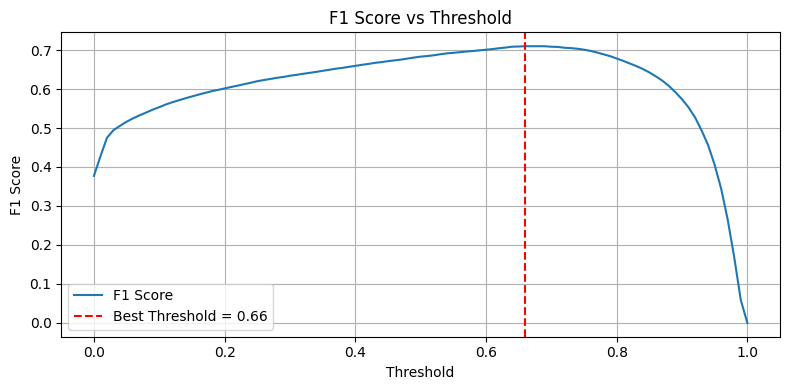

In [71]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Tuning CatBoost với Optuna**

In [72]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:32:20,400] A new study created in memory with name: no-name-d2d4d0da-5461-446e-89db-8d9ac6115006
[I 2025-05-04 07:32:22,590] Trial 0 finished with value: 0.7068073660252431 and parameters: {'iterations': 285, 'depth': 6, 'learning_rate': 0.25169721162822917}. Best is trial 0 with value: 0.7068073660252431.
[I 2025-05-04 07:32:27,702] Trial 1 finished with value: 0.6822825816097683 and parameters: {'iterations': 416, 'depth': 8, 'learning_rate': 0.2792508495399602}. Best is trial 0 with value: 0.7068073660252431.
[I 2025-05-04 07:32:30,642] Trial 2 finished with value: 0.6963129223071707 and parameters: {'iterations': 137, 'depth': 9, 'learning_rate': 0.16017281418556537}. Best is trial 0 with value: 0.7068073660252431.
[I 2025-05-04 07:32:32,277] Trial 3 finished with value: 0.7065146798647347 and parameters: {'iterations': 122, 'depth': 6, 'learning_rate': 0.23317379501670857}. Best is trial 0 with value: 0.7068073660252431.
[I 2025-05-04 07:32:34,731] Trial 4 finishe

Best trial:
FrozenTrial(number=9, state=1, values=[0.7204640187018945], datetime_start=datetime.datetime(2025, 5, 4, 7, 32, 51, 382220), datetime_complete=datetime.datetime(2025, 5, 4, 7, 32, 53, 958079), params={'iterations': 335, 'depth': 5, 'learning_rate': 0.13624423517615764}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=9, value=None)
Best F1 Score: 0.7204640187018945
Best hyperparameters:
iterations: 335
depth: 5
learning_rate: 0.13624423517615764

Classification report with threshold = 0.66:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     68556
           1       0.67      0.77      0.71     20763

    accuracy                           0.86     89319
   macro avg       0.80      0.83

In [73]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=292,
#     depth=5,
#     learning_rate=0.25030502714970054,
#     scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.83
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

In [74]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_selected, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_selected)[:, 1]


y_pred = cat_model.predict(X_test_selected)
print_scores( y_test, y_pred)

y_probs = cat_model.predict_proba(X_test_selected)[:,1]

best_thresh = 0.0
best_f1 = 0.0
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     68556
           1       0.52      0.90      0.66     20763

    accuracy                           0.79     89319
   macro avg       0.74      0.82      0.75     89319
weighted avg       0.86      0.79      0.80     89319

Best threshold: 0.7000000000000002, F1: 0.6929192329533045


In [75]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_selected, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_selected)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_selected, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_selected)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:35:18,942] A new study created in memory with name: no-name-13c8319f-6f04-411e-8f9e-4054facd4a04
[I 2025-05-04 07:35:24,220] Trial 0 finished with value: 0.6550854722404317 and parameters: {'iterations': 320, 'depth': 9, 'learning_rate': 0.2964106025036861}. Best is trial 0 with value: 0.6550854722404317.
[I 2025-05-04 07:35:27,056] Trial 1 finished with value: 0.6880126897801949 and parameters: {'iterations': 489, 'depth': 4, 'learning_rate': 0.2599075040457041}. Best is trial 1 with value: 0.6880126897801949.
[I 2025-05-04 07:35:28,944] Trial 2 finished with value: 0.6916957617006233 and parameters: {'iterations': 218, 'depth': 5, 'learning_rate': 0.17712057482282165}. Best is trial 2 with value: 0.6916957617006233.
[I 2025-05-04 07:35:31,422] Trial 3 finished with value: 0.6877507776926197 and parameters: {'iterations': 226, 'depth': 7, 'learning_rate': 0.18426149998895067}. Best is trial 2 with value: 0.6916957617006233.
[I 2025-05-04 07:35:33,177] Trial 4 finished

Best trial:
FrozenTrial(number=32, state=1, values=[0.6961522779458786], datetime_start=datetime.datetime(2025, 5, 4, 7, 36, 39, 183981), datetime_complete=datetime.datetime(2025, 5, 4, 7, 36, 41, 683042), params={'iterations': 296, 'depth': 6, 'learning_rate': 0.027851983135014302}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=32, value=None)
Best F1 Score: 0.6961522779458786
Best hyperparameters:
iterations: 296
depth: 6
learning_rate: 0.027851983135014302

Classification report with threshold = 0.7000000000000002:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     68556
           1       0.62      0.79      0.69     20763

    accuracy                           0.84     89319
   macro avg   

In [76]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=336,
#     depth=6,
#     learning_rate=0.054827476508008136,
#     scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_selected, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_selected)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.85
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

In [77]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_scaled)[:, 1]


y_pred = cat_model.predict(X_test_scaled)
print_scores( y_test, y_pred)

y_probs = cat_model.predict_proba(X_test_scaled)[:,1]

best_thresh = 0.0
best_f1 = 0.0
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

              precision    recall  f1-score   support

           0       0.96      0.79      0.86     68556
           1       0.56      0.89      0.69     20763

    accuracy                           0.81     89319
   macro avg       0.76      0.84      0.77     89319
weighted avg       0.87      0.81      0.82     89319

Best threshold: 0.7000000000000002, F1: 0.7109756929443597


In [78]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_scaled, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'task_type': 'GPU',
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:37:37,614] A new study created in memory with name: no-name-2d8519d3-0b4b-46be-8d09-dfb90201b667
[I 2025-05-04 07:37:42,263] Trial 0 finished with value: 0.6788227283044563 and parameters: {'iterations': 264, 'depth': 9, 'learning_rate': 0.2880439107294177}. Best is trial 0 with value: 0.6788227283044563.
[I 2025-05-04 07:37:50,528] Trial 1 finished with value: 0.6528099347505788 and parameters: {'iterations': 302, 'depth': 10, 'learning_rate': 0.2921015451698076}. Best is trial 0 with value: 0.6788227283044563.
[I 2025-05-04 07:37:52,592] Trial 2 finished with value: 0.7112456430012842 and parameters: {'iterations': 206, 'depth': 6, 'learning_rate': 0.0805748973653791}. Best is trial 2 with value: 0.7112456430012842.
[I 2025-05-04 07:37:57,926] Trial 3 finished with value: 0.6914803565204403 and parameters: {'iterations': 442, 'depth': 8, 'learning_rate': 0.1661825537936366}. Best is trial 2 with value: 0.7112456430012842.
[I 2025-05-04 07:37:59,853] Trial 4 finished 

Best trial:
FrozenTrial(number=31, state=1, values=[0.7152653478695459], datetime_start=datetime.datetime(2025, 5, 4, 7, 39, 24, 800662), datetime_complete=datetime.datetime(2025, 5, 4, 7, 39, 27, 853292), params={'iterations': 369, 'depth': 6, 'learning_rate': 0.08449105347067556}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=31, value=None)
Best F1 Score: 0.7152653478695459
Best hyperparameters:
iterations: 369
depth: 6
learning_rate: 0.08449105347067556

Classification report with threshold = 0.7000000000000002:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     68556
           1       0.69      0.74      0.72     20763

    accuracy                           0.86     89319
   macro avg     

In [79]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=322,
#     depth=6,
#     learning_rate=0.1432105130052586,
#     scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_scaled, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_scaled)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.85
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

# 6. Cân bằng dữ liệu (Oversampling)

## 6.1 SMOTE

In [80]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_sm.shape, y_sm.shape

scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_sm)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features] 

In [81]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_sm, y_sm)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.138802
0:	learn: 0.5894788	total: 60.9ms	remaining: 1m
1:	learn: 0.5195850	total: 120ms	remaining: 59.7s
2:	learn: 0.4709250	total: 175ms	remaining: 58.3s
3:	learn: 0.4359306	total: 235ms	remaining: 58.4s
4:	learn: 0.4105905	total: 293ms	remaining: 58.2s
5:	learn: 0.3922532	total: 348ms	remaining: 57.7s
6:	learn: 0.3787776	total: 406ms	remaining: 57.6s
7:	learn: 0.3671220	total: 464ms	remaining: 57.5s
8:	learn: 0.3598762	total: 516ms	remaining: 56.8s
9:	learn: 0.3539853	total: 575ms	remaining: 56.9s
10:	learn: 0.3484344	total: 631ms	remaining: 56.7s
11:	learn: 0.3444964	total: 687ms	remaining: 56.6s
12:	learn: 0.3405758	total: 738ms	remaining: 56.1s
13:	learn: 0.3367992	total: 795ms	remaining: 56s
14:	learn: 0.3342260	total: 852ms	remaining: 56s
15:	learn: 0.3317855	total: 910ms	remaining: 56s
16:	learn: 0.3282198	total: 962ms	remaining: 55.6s
17:	learn: 0.3245308	total: 1.02s	remaining: 55.6s
18:	learn: 0.3226690	total: 1.07s	remaining: 55.4s
19:	learn: 0.320864

In [82]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_sm[top_features], y_sm)

# Predict
y_pred = cat_model.predict(X_test[top_features])

print_scores(y_test, y_pred)

Learning rate set to 0.138802
0:	learn: 0.5937101	total: 49.7ms	remaining: 49.6s
1:	learn: 0.5273874	total: 95.4ms	remaining: 47.6s
2:	learn: 0.4813830	total: 145ms	remaining: 48.1s
3:	learn: 0.4469275	total: 193ms	remaining: 48.1s
4:	learn: 0.4214814	total: 242ms	remaining: 48.2s
5:	learn: 0.4040736	total: 289ms	remaining: 48s
6:	learn: 0.3909932	total: 339ms	remaining: 48.1s
7:	learn: 0.3818951	total: 393ms	remaining: 48.7s
8:	learn: 0.3739134	total: 449ms	remaining: 49.4s
9:	learn: 0.3680575	total: 498ms	remaining: 49.3s
10:	learn: 0.3638886	total: 545ms	remaining: 49s
11:	learn: 0.3600114	total: 589ms	remaining: 48.5s
12:	learn: 0.3561638	total: 638ms	remaining: 48.4s
13:	learn: 0.3532071	total: 687ms	remaining: 48.4s
14:	learn: 0.3505028	total: 733ms	remaining: 48.1s
15:	learn: 0.3480363	total: 780ms	remaining: 48s
16:	learn: 0.3456098	total: 827ms	remaining: 47.8s
17:	learn: 0.3438158	total: 872ms	remaining: 47.6s
18:	learn: 0.3416890	total: 923ms	remaining: 47.6s
19:	learn: 0.33

=> Không nên chọn đặc trưng.

In [83]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=5.300729681724353,    # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_sm, y_sm)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.64      0.78     68556
           1       0.45      0.96      0.61     20763

    accuracy                           0.72     89319
   macro avg       0.72      0.80      0.69     89319
weighted avg       0.86      0.72      0.74     89319



In [84]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_sm[top_features], y_sm)

# Predict
y_pred = cat_model.predict(X_test[top_features])

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.53      0.69     68556
           1       0.39      0.98      0.55     20763

    accuracy                           0.64     89319
   macro avg       0.69      0.75      0.62     89319
weighted avg       0.85      0.64      0.66     89319



| Cấu hình | Đặc trưng | Tùy chọn mô hình | Accuracy | F1-score lớp 1 | Nhận xét |
|----------|-----------|------------------|----------|----------------|----------|
| **SMOTE + Mặc định** | 30 | CatBoost mặc định | 0.81 | 0.59 | Kết quả tốt, cân bằng giữa hai lớp |
| **SMOTE + Mặc định** | 10 | CatBoost mặc định | 0.80 | 0.57 | Giảm nhẹ khi giảm đặc trưng |
| **SMOTE + Tuning** | 30 | 300 iter, depth=6, LR=0.05, SPW=3.36 | 0.67 | 0.57 | Accuracy thấp hơn dù precision cao |
| **SMOTE + Tuning** | 10 | như trên | 0.65 | 0.55 | Kết quả kém hơn khi giảm đặc trưng |

=> Bỏ scaled_pos_weight vì đã dùng SMOTE, không giảm đặc trưng

Best Threshold: 0.63, F1: 0.6945117029862792


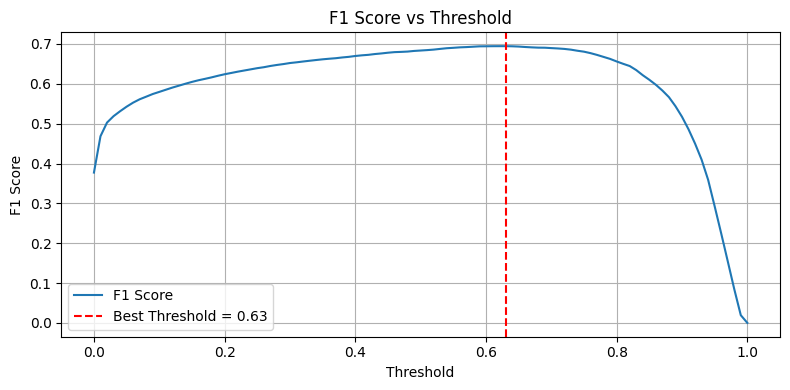

In [85]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    # scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_sm, y_sm)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, F1: {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_sm, y_sm)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'task_type': 'GPU',
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_sm, y_sm)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:43:09,739] A new study created in memory with name: no-name-e61523a0-1526-4981-8dc0-e4da84366c3b
[I 2025-05-04 07:43:13,429] Trial 0 finished with value: 0.6934123222748816 and parameters: {'iterations': 268, 'depth': 8, 'learning_rate': 0.0904570136257928}. Best is trial 0 with value: 0.6934123222748816.
[I 2025-05-04 07:43:19,648] Trial 1 finished with value: 0.6968321725454953 and parameters: {'iterations': 465, 'depth': 8, 'learning_rate': 0.027520548979056675}. Best is trial 1 with value: 0.6968321725454953.
[I 2025-05-04 07:43:24,282] Trial 2 finished with value: 0.6991637018897565 and parameters: {'iterations': 426, 'depth': 7, 'learning_rate': 0.060144055204609685}. Best is trial 2 with value: 0.6991637018897565.
[I 2025-05-04 07:43:27,242] Trial 3 finished with value: 0.6888903357423443 and parameters: {'iterations': 171, 'depth': 8, 'learning_rate': 0.030577674377597695}. Best is trial 2 with value: 0.6991637018897565.
[I 2025-05-04 07:43:29,565] Trial 4 fini

Best trial:
FrozenTrial(number=2, state=1, values=[0.6991637018897565], datetime_start=datetime.datetime(2025, 5, 4, 7, 43, 19, 649069), datetime_complete=datetime.datetime(2025, 5, 4, 7, 43, 24, 282528), params={'iterations': 426, 'depth': 7, 'learning_rate': 0.060144055204609685}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=2, value=None)
Best F1 Score: 0.6991637018897565
Best hyperparameters:
iterations: 426
depth: 7
learning_rate: 0.060144055204609685

Classification report with threshold = 0.63:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     68556
           1       0.67      0.73      0.70     20763

    accuracy                           0.85     89319
   macro avg       0.79      0.

In [87]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=395,
#     depth=4,
#     learning_rate=0.10643275132479328,
#     # scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_sm, y_sm)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.7
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

## 6.2 SMOTE ENN

In [88]:
# SMOTE ENN
from imblearn.combine import SMOTEENN

smenn = SMOTEENN()

X_smenn, y_smenn = smenn.fit_resample(X_train, y_train)
X_smenn.shape, y_sm.shape

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_smenn)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features] 


In [89]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.024416
0:	learn: 0.6643923	total: 7.99ms	remaining: 7.98s
1:	learn: 0.6372587	total: 14.9ms	remaining: 7.42s
2:	learn: 0.6124004	total: 21.8ms	remaining: 7.24s
3:	learn: 0.5892946	total: 28.7ms	remaining: 7.14s
4:	learn: 0.5676423	total: 36.1ms	remaining: 7.18s
5:	learn: 0.5475613	total: 42.3ms	remaining: 7s
6:	learn: 0.5289764	total: 48.6ms	remaining: 6.9s
7:	learn: 0.5117513	total: 54.9ms	remaining: 6.8s
8:	learn: 0.4953947	total: 61.5ms	remaining: 6.77s
9:	learn: 0.4798643	total: 67.7ms	remaining: 6.7s
10:	learn: 0.4660828	total: 73.9ms	remaining: 6.64s
11:	learn: 0.4530293	total: 80.2ms	remaining: 6.61s
12:	learn: 0.4408451	total: 86.4ms	remaining: 6.56s
13:	learn: 0.4298486	total: 92.6ms	remaining: 6.52s
14:	learn: 0.4194535	total: 98.8ms	remaining: 6.49s
15:	learn: 0.4091852	total: 105ms	remaining: 6.46s
16:	learn: 0.4002260	total: 111ms	remaining: 6.44s
17:	learn: 0.3917469	total: 118ms	remaining: 6.41s
18:	learn: 0.3837736	total: 124ms	remaining: 6.39s
19

In [90]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_train_scaled, y_smenn)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

Learning rate set to 0.024416
0:	learn: 0.6643924	total: 7.8ms	remaining: 7.8s
1:	learn: 0.6372588	total: 14.2ms	remaining: 7.09s
2:	learn: 0.6124002	total: 20.3ms	remaining: 6.76s
3:	learn: 0.5892946	total: 26.4ms	remaining: 6.58s
4:	learn: 0.5676422	total: 32.8ms	remaining: 6.53s
5:	learn: 0.5475611	total: 38.9ms	remaining: 6.45s
6:	learn: 0.5289763	total: 45.1ms	remaining: 6.4s
7:	learn: 0.5117513	total: 51.5ms	remaining: 6.38s
8:	learn: 0.4953946	total: 57.8ms	remaining: 6.36s
9:	learn: 0.4798642	total: 64ms	remaining: 6.33s
10:	learn: 0.4660827	total: 70.4ms	remaining: 6.33s
11:	learn: 0.4530293	total: 76.8ms	remaining: 6.32s
12:	learn: 0.4408451	total: 83.1ms	remaining: 6.31s
13:	learn: 0.4298486	total: 89.4ms	remaining: 6.29s
14:	learn: 0.4194536	total: 95.8ms	remaining: 6.29s
15:	learn: 0.4091852	total: 102ms	remaining: 6.28s
16:	learn: 0.4002258	total: 109ms	remaining: 6.28s
17:	learn: 0.3917469	total: 115ms	remaining: 6.26s
18:	learn: 0.3837736	total: 121ms	remaining: 6.25s
1

=> Không chọn đặc trưng, scale cũng có cải thiện.

In [91]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_train_scaled[top_features], y_smenn)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

Learning rate set to 0.024416
0:	learn: 0.6657328	total: 6.78ms	remaining: 6.77s
1:	learn: 0.6404930	total: 12.8ms	remaining: 6.38s
2:	learn: 0.6166648	total: 18.8ms	remaining: 6.23s
3:	learn: 0.5945007	total: 24.7ms	remaining: 6.15s
4:	learn: 0.5737298	total: 30.6ms	remaining: 6.09s
5:	learn: 0.5544536	total: 36.6ms	remaining: 6.06s
6:	learn: 0.5366421	total: 42.5ms	remaining: 6.02s
7:	learn: 0.5201413	total: 48.5ms	remaining: 6.01s
8:	learn: 0.5049404	total: 54.3ms	remaining: 5.98s
9:	learn: 0.4906838	total: 60.3ms	remaining: 5.97s
10:	learn: 0.4767104	total: 66.4ms	remaining: 5.96s
11:	learn: 0.4638958	total: 72.4ms	remaining: 5.96s
12:	learn: 0.4520127	total: 78.3ms	remaining: 5.95s
13:	learn: 0.4413219	total: 84.2ms	remaining: 5.93s
14:	learn: 0.4308774	total: 90.1ms	remaining: 5.92s
15:	learn: 0.4211010	total: 96.1ms	remaining: 5.91s
16:	learn: 0.4123249	total: 102ms	remaining: 5.89s
17:	learn: 0.4036999	total: 108ms	remaining: 5.89s
18:	learn: 0.3957962	total: 114ms	remaining: 5

In [92]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     68556
           1       0.48      0.95      0.63     20763

    accuracy                           0.75     89319
   macro avg       0.73      0.82      0.72     89319
weighted avg       0.86      0.75      0.77     89319



In [93]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     68556
           1       0.57      0.85      0.68     20763

    accuracy                           0.82     89319
   macro avg       0.76      0.83      0.78     89319
weighted avg       0.86      0.82      0.83     89319



=> Không dùng scale_pos_weight

In [94]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled, y_smenn)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     68556
           1       0.58      0.85      0.69     20763

    accuracy                           0.82     89319
   macro avg       0.76      0.83      0.78     89319
weighted avg       0.86      0.82      0.83     89319



=> Dùng scale hay không đều được

In [95]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=5.300729681724353,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled[top_features], y_smenn)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     68556
           1       0.51      0.89      0.65     20763

    accuracy                           0.78     89319
   macro avg       0.73      0.81      0.74     89319
weighted avg       0.85      0.78      0.79     89319



**Tuning CatBoost chỉ SMOTE ENN với Optuna**

Best Threshold: 0.67, Best F1 Score : 0.698084972565009


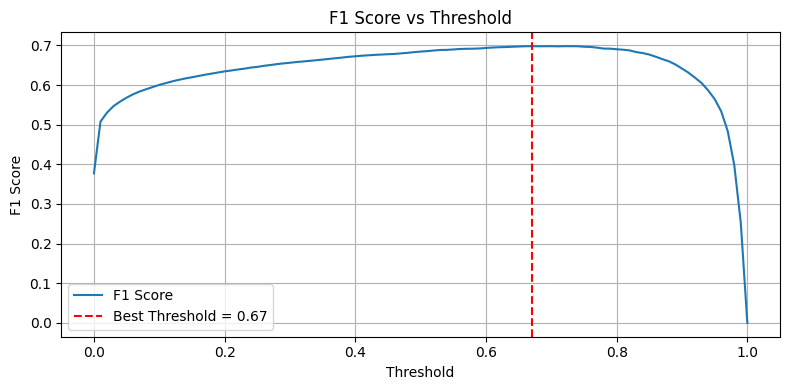

In [96]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_smenn, y_smenn)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, Best F1 Score : {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  # Đừng quá cao
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_smenn, y_smenn)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_smenn, y_smenn)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:52:01,450] A new study created in memory with name: no-name-1884f0d2-9fc8-4b1a-a3bf-f0af04f0052c
[I 2025-05-04 07:52:03,705] Trial 0 finished with value: 0.702190386757223 and parameters: {'iterations': 257, 'depth': 6, 'learning_rate': 0.0852538103674417}. Best is trial 0 with value: 0.702190386757223.
[I 2025-05-04 07:52:05,860] Trial 1 finished with value: 0.6964132562179756 and parameters: {'iterations': 204, 'depth': 5, 'learning_rate': 0.11935505678073093}. Best is trial 0 with value: 0.702190386757223.
[I 2025-05-04 07:52:08,512] Trial 2 finished with value: 0.7011093218822687 and parameters: {'iterations': 338, 'depth': 4, 'learning_rate': 0.14031115270246583}. Best is trial 0 with value: 0.702190386757223.
[I 2025-05-04 07:52:11,011] Trial 3 finished with value: 0.6941201809175102 and parameters: {'iterations': 315, 'depth': 4, 'learning_rate': 0.06733395802104307}. Best is trial 0 with value: 0.702190386757223.
[I 2025-05-04 07:52:15,279] Trial 4 finished wit

Best trial:
FrozenTrial(number=6, state=1, values=[0.7022857268085293], datetime_start=datetime.datetime(2025, 5, 4, 7, 52, 17, 956815), datetime_complete=datetime.datetime(2025, 5, 4, 7, 52, 21, 546073), params={'iterations': 246, 'depth': 8, 'learning_rate': 0.055663633556366166}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=6, value=None)
Best F1 Score: 0.7022857268085293
Best hyperparameters:
iterations: 246
depth: 8
learning_rate: 0.055663633556366166

Classification report with threshold = 0.67:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     68556
           1       0.64      0.77      0.70     20763

    accuracy                           0.85     89319
   macro avg       0.78      0.

In [98]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=434,
#     depth=6,
#     learning_rate=0.097919302671831,
#     # scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_smenn, y_smenn)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.77
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

**Tuning CatBoost SMOTE ENN và đã chuẩn hóa với Optuna**

Best Threshold: 0.7000000000000001, Best F1 Score : 0.7021460751459199


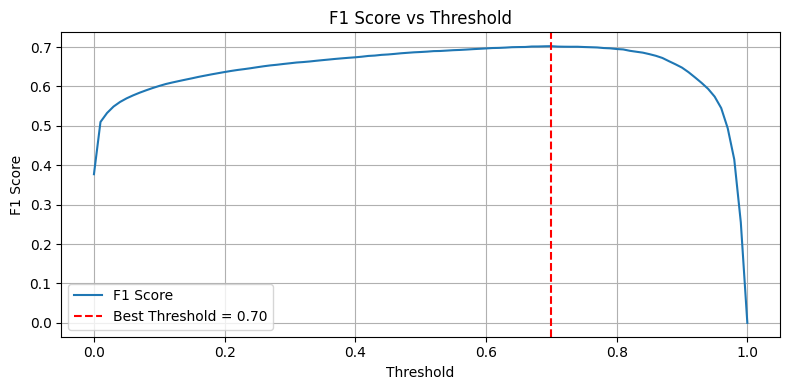

In [99]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=5.300729681724353,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_smenn)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_scaled)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, Best F1 Score : {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 5.300729681724353

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  # Đừng quá cao
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_scaled, y_smenn)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_scaled, y_smenn)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:53:46,710] A new study created in memory with name: no-name-efd21ea6-105a-46f8-bf1f-ee382340b135
[I 2025-05-04 07:53:49,825] Trial 0 finished with value: 0.6974848573551596 and parameters: {'iterations': 234, 'depth': 8, 'learning_rate': 0.08314720199142385}. Best is trial 0 with value: 0.6974848573551596.
[I 2025-05-04 07:53:52,050] Trial 1 finished with value: 0.6952385128025255 and parameters: {'iterations': 145, 'depth': 7, 'learning_rate': 0.04508437388937796}. Best is trial 0 with value: 0.6974848573551596.
[I 2025-05-04 07:53:57,611] Trial 2 finished with value: 0.692647378200333 and parameters: {'iterations': 425, 'depth': 8, 'learning_rate': 0.13889896733127913}. Best is trial 0 with value: 0.6974848573551596.
[I 2025-05-04 07:54:00,054] Trial 3 finished with value: 0.6967904286786456 and parameters: {'iterations': 183, 'depth': 7, 'learning_rate': 0.055398355086225703}. Best is trial 0 with value: 0.6974848573551596.
[I 2025-05-04 07:54:02,955] Trial 4 finish

Best trial:
FrozenTrial(number=13, state=1, values=[0.7063932220989783], datetime_start=datetime.datetime(2025, 5, 4, 7, 54, 26, 374701), datetime_complete=datetime.datetime(2025, 5, 4, 7, 54, 30, 415972), params={'iterations': 380, 'depth': 7, 'learning_rate': 0.14220195694393062}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=13, value=None)
Best F1 Score: 0.7063932220989783
Best hyperparameters:
iterations: 380
depth: 7
learning_rate: 0.14220195694393062

Classification report with threshold = 0.7000000000000001:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     68556
           1       0.69      0.71      0.70     20763

    accuracy                           0.86     89319
   macro avg     

In [101]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=452,
#     depth=4,
#     learning_rate=0.12655128193358028,
#     # scale_pos_weight=5.300729681724353,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_scaled, y_smenn)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_scaled)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.76
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

# 7. Kết luận

* Nếu **muốn mô hình ổn định, đơn giản, không xử lý dữ liệu phức tạp** → **Chọn mô hình gốc dùng `scale_pos_weight`**
* Nếu **ưu tiên recall cao nhất (bắt hết mưa)**, chấp nhận nhiều cảnh báo giả → **Chọn mô hình SMOTEENN + chuẩn hóa**
* Nếu **ưu tiên precision cao (giảm cảnh báo giả)**, chấp nhận một số mưa bị bỏ sót → **Chọn mô hình SMOTE**

Cả 3 mô hình có f1 bằng nhau.